Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру.
Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.
Для этого нужно построить модель, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы.

Описание датасета (переменные, которые содержит датасет):

1. school — аббревиатура школы, в которой учится ученик
2. sex — пол ученика ('F' - женский, 'M' - мужской)
3. age — возраст ученика (от 15 до 22)
4. address — тип адреса ученика ('U' - городской, 'R' - за городом)
5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)
6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. failures — количество внеучебных неудач (n, если 1<=n<3, иначе 4)
16. schoolsup — дополнительная образовательная поддержка (yes или no)
17. famsup — семейная образовательная поддержка (yes или no)
18. paid — дополнительные платные занятия по математике (yes или no)
19. activities — дополнительные внеучебные занятия (yes или no)
20. nursery — посещал детский сад (yes или no)
21. higher — хочет получить высшее образование (yes или no)
22. internet — наличие интернета дома (yes или no)
23. romantic — в романтических отношениях (yes или no)
24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. absences — количество пропущенных занятий
29. score — баллы по госэкзамену по математике

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

df = pd.read_csv('stud_math.xls')

In [2]:
#Проверяем загруженный датасет. На глаз оцениваем ситуацию по значениям в столбцах.
display(df.head(10))
df.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

Проанализировав первичную информацию получаем, что:
1. Числовых ряда - 3
2. Бинарных - 12
3. Оценочные - 13
4. Номинальный - 1
5. Присутсвует столбец, которого не было в начальном описании 'studytime, granular', сложно сказать, что это вообще, надеюсь дальше разберемся.

In [3]:
#Теперь время взглянуть как записаны столбцы
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [4]:
#Видим, что отсутсвует однообразие в написании, стоит все привести в порядок
df.rename(columns={'Pstatus': 'p_status', 'Medu':'m_edu', 'Fedu':'f_edu',
       'Mjob':'m_job', 'Fjob':'f_job', 'studytime, granular': 'st_gr'}, inplace=True)

In [5]:
#Без проверки в нашем деле никуда
display(df.head(5))

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,st_gr,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


Дальше будем проверять каждую колонку по отдельности и приводить ее, по возможности, в удовлетворимый вид.

In [6]:
#Посмотрим количество уникальных значений в столбце "school"
pd.DataFrame(df.school.value_counts())

,school
GP,349
MS,46


Еще на первом этапе мы увидели, что пропусков в этом столбце нет. Теперь же мы знаем, что всего школ две и на это можно смотреть как на бинарный признак

,f_edu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


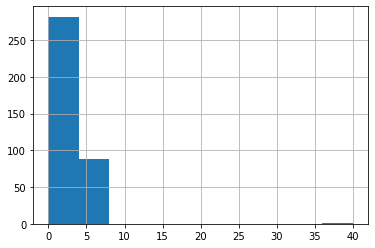

In [7]:
#Столбец Fedu в котором описано образование отца
df.f_edu.hist()
pd.DataFrame(df.f_edu.value_counts())

In [8]:
#Очевидный выброс значение "40.0". Можем его спокойно изменить на "4.0". Спишем на человеческий фактор
df.loc[df['f_edu'] == 40.0, 'f_edu'] = 4.0

In [9]:
pd.DataFrame(df.f_edu.value_counts())

,f_edu
2.0,106
3.0,96
4.0,89
1.0,78
0.0,2


In [10]:
df.loc[:, ['f_edu']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
f_edu    371 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


Так, одно знаечение поменяли, еще имеем 24 пропуска, пока с ними ничего делать не будем, пойдем дальше.

,m_edu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


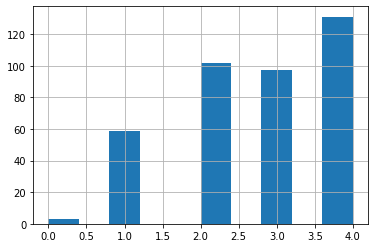

In [11]:
#Столбец Medu в котором описано образование матери
df.m_edu.hist()
pd.DataFrame(df.m_edu.value_counts())

In [12]:
df.loc[:, ['m_edu']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
m_edu    392 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


Тут ситуация явно лучше, всего 3 пропуска, чтож, пойдем дальше.

,m_job
other,133
services,98
at_home,58
teacher,55
health,32


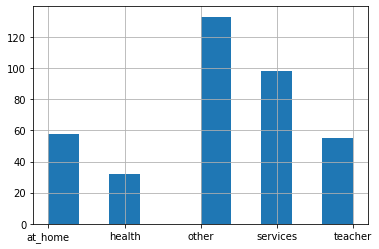

In [13]:
#Столбец Mjob в котором описана работа матери
df.m_job.hist()
pd.DataFrame(df.m_job.value_counts())

In [14]:
df.loc[:, ['m_job']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
m_job    376 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


Так, тут мы имеем 19 пустых значений, пока изменить не получится, идем дальше.

,f_job
other,197
services,102
teacher,29
at_home,16
health,15


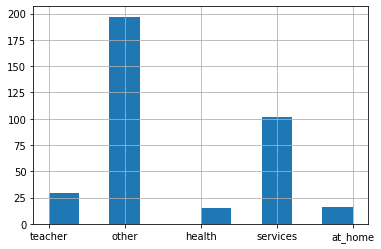

In [15]:
#Столбец Fjob в котором описана работа отца
df.f_job.hist()
pd.DataFrame(df.f_job.value_counts())

In [16]:
df.loc[:, ['f_job']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
f_job    359 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


Видим довольно печальную ситуацию. 36 пустых значениями. Идем дальше.

,reason
course,137
home,104
reputation,103
other,34


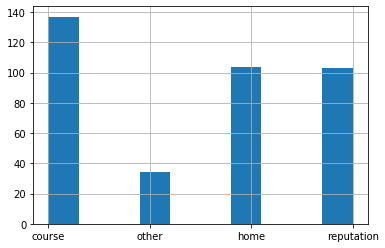

In [17]:
#Столбе reason в котором описана причина выбора школы
df.reason.hist()
pd.DataFrame(df.reason.value_counts())

In [18]:
df.loc[:, ['reason']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
reason    378 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


16 пустых значений. Тут пришла идея, как говорится в статистике, если есть поле "иное", а ты не знаешь куда записать значение, записывай туда, но пока повременим.

In [19]:
#Столбец guardian в котором описан опекун
pd.DataFrame(df.guardian.value_counts())

,guardian
mother,250
father,86
other,28


In [20]:
df.loc[:, ['guardian']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
guardian    364 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


31 пропущенное значение. Думаю вполне можно было бы присвоить значения "mother", но дойдем до конца, а там уже решим.

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


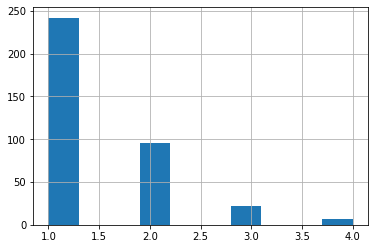

In [21]:
#Столбец traveltime в котором описано время пути до школы
df.traveltime.hist()
pd.DataFrame(df.traveltime.value_counts())

In [22]:
df.loc[:, ['traveltime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
traveltime    367 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


28 пустых значений. Тут пока нет идей, идем дальше.

,failures
0.0,293
1.0,49
2.0,16
3.0,15


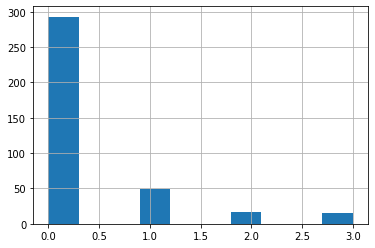

In [23]:
#Столбец failures в котором описано количество внеучебных неудач
df.failures.hist()
pd.DataFrame(df.failures.value_counts())

In [24]:
df.loc[:, ['failures']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
failures    373 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


И снова пропуски, 22 значения. Исходя из увиденного, можно попробовать 22-м значения присвоть -"0".

In [25]:
#Посмотрим среднее значение
df.describe()

,age,m_edu,f_edu,traveltime,studytime,failures,st_gr,famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.517520,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,1.088808,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [26]:
#Видим, что оно равно "0.34". Не вижу ничего креминального, чтобы всетаки присвоить 22 NaN значения "0"
df.loc[(df.failures.isnull()) , 'failures'] = 0.0

In [27]:
#Проверяем, на сколько сильно изменилось среднее значение
df.describe()

,age,m_edu,f_edu,traveltime,studytime,failures,st_gr,famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,395.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.517520,1.438692,2.038660,0.318987,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,1.088808,0.694181,0.842078,0.726244,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


Заполнил пропуски- "0", среднее значние изменилось на 0.02, на первый взгляд, цифра абсолютна не критичная. Идем дальше.

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


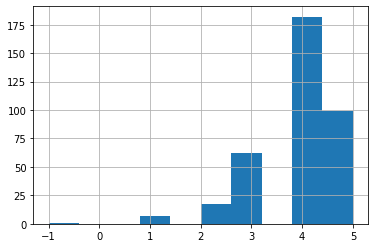

In [28]:
#Столбец famrel в котором описаны семейные отношения
df.famrel.hist()
pd.DataFrame(df.famrel.value_counts())

In [29]:
#Сразу видим выброс "-1.0", значение которого нет в описании, скорее всего снова человеческий фактор
#Изменим на "1.0"
df.loc[df['famrel'] == -1.0, 'famrel'] = 1.0

In [30]:
pd.DataFrame(df.famrel.value_counts())
#все ОК

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,8


In [31]:
df.loc[:, ['famrel']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
famrel    368 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [32]:
#Заметим, что у нас есть 27 пустых значений. Попробуем сделать группировку по полю "score" и "famrel". 
#Посмотрим на сколько вляют семейные отношения на итоговую оценку
#Возьмем например, что оценка "score", больше либо равно "50.0"
pd.DataFrame(df[df['score'] >= 50.0].groupby(['score','famrel']).famrel.count())

famrel
score famrel        
50.0  3.0          8
      4.0         30
      5.0         14
55.0  1.0          1
      2.0          3
      3.0          8
      4.0         23
      5.0          9
60.0  1.0          2
      2.0          1
      3.0          4
      4.0         13
      5.0         10
65.0  1.0          2
      2.0          1
      3.0          6
      4.0         13
      5.0          7
70.0  3.0          5
      4.0         11
      5.0          7
75.0  2.0          3
      3.0          5
      4.0         11
      5.0         10
80.0  1.0          1
      2.0          1
      4.0          9
      5.0          5
85.0  2.0          1
      4.0          3
      5.0          2
90.0  3.0          3
      4.0          4
      5.0          5
95.0  3.0          1
      4.0          1
      5.0          2
100.0 4.0          1

In [33]:
#Получается, что в преобладающем большенстве, те у кого баллов больше либо равно "60" имеют оценку отношений в семье от 3.0 до 4.0
#Выберем отдельно те значения, которые у нас пустые и попробуем проанализировать.
fs = df[df.famrel.isnull()]
fs

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,st_gr,higher,internet,romantic,famrel,freetime,goout,health,absences,score
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
12,GP,M,15,U,LE3,T,4.0,4.0,health,services,course,father,1.0,1.0,0.0,no,yes,yes,yes,yes,-3.0,yes,NaN,no,NaN,3.0,3.0,5.0,2.0,70.0
20,GP,M,15,U,GT3,T,4.0,3.0,teacher,other,reputation,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,NaN,4.0,1.0,1.0,0.0,75.0
43,GP,M,15,U,GT3,T,2.0,2.0,services,services,course,father,1.0,1.0,0.0,yes,yes,no,NaN,yes,-3.0,yes,yes,no,NaN,4.0,1.0,1.0,0.0,55.0
72,GP,F,15,R,GT3,T,1.0,1.0,other,other,reputation,mother,1.0,2.0,2.0,yes,yes,no,no,no,-6.0,yes,yes,yes,NaN,3.0,4.0,5.0,2.0,25.0
73,GP,M,16,U,GT3,T,3.0,1.0,other,other,NaN,mother,1.0,1.0,0.0,no,no,no,yes,yes,-3.0,yes,no,no,NaN,3.0,2.0,5.0,2.0,70.0
75,GP,M,15,NaN,GT3,T,4.0,3.0,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,NaN,NaN,3.0,3.0,5.0,6.0,50.0
94,GP,M,15,U,LE3,T,2.0,2.0,services,health,reputation,mother,1.0,4.0,0.0,no,yes,no,yes,yes,-12.0,yes,yes,no,NaN,3.0,4.0,4.0,6.0,70.0
102,GP,M,15,U,GT3,T,4.0,4.0,services,other,course,mother,1.0,1.0,0.0,no,yes,no,yes,no,-3.0,yes,yes,no,NaN,3.0,3.0,5.0,4.0,70.0
118,GP,M,17,R,GT3,T,1.0,3.0,other,NaN,course,father,3.0,2.0,1.0,no,yes,no,yes,yes,-6.0,yes,NaN,no,NaN,2.0,4.0,5.0,20.0,40.0


In [34]:
#Просмотрев оценки тех,чьи значения отношения в семье пустые, попробуем подсчитать тех, кто получил больше 50 и тех, кто получил меньше 50 за экзамен
print(len(fs[fs.score>=50]))#Данному колличеству можно поставить отношения 4.0
print(len(fs[fs.score<50]))#Данному колличеству можно поставить отношения 3.0

16
11


In [35]:
#Теперь заполним значения исходя из наших выводов.
df.loc[(df['score'] >= 50.0) & (df.famrel.isnull()) , 'famrel'] = 4.0
df.loc[(df['score'] < 50.0) & (df.famrel.isnull()) , 'famrel'] = 3.0

In [36]:
df.loc[:, ['famrel']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
famrel    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [37]:
pd.DataFrame(df.famrel.value_counts())

,famrel
4.0,198
5.0,99
3.0,73
2.0,17
1.0,8


Все получилось, теперь этот столбец без пропусков. Идем дальше.

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


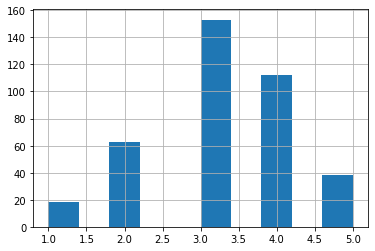

In [38]:
#Столбец freetime в котором описано свободное время после школы
df.freetime.hist()
pd.DataFrame(df.freetime.value_counts())

In [39]:
df.loc[:, ['freetime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
freetime    384 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [40]:
#Получаем 11 пустых значений. Явно доминирующие значения это 3.0 и 4.0

In [41]:
#Снова проанализируем пустые значения и какой у этих строчек "score"
display(df[df.freetime.isnull()])

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,st_gr,higher,internet,romantic,famrel,freetime,goout,health,absences,score
32,GP,M,15,R,NaN,T,4.0,3.0,teacher,at_home,course,mother,1.0,2.0,0.0,no,yes,no,yes,NaN,-6.0,yes,yes,yes,4.0,NaN,2.0,5.0,0.0,80.0
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,NaN,3.0,5.0,54.0,55.0
131,GP,F,15,U,GT3,NaN,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
201,GP,F,16,U,GT3,T,2.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,yes,yes,NaN,yes,yes,-6.0,yes,no,no,4.0,NaN,3.0,4.0,6.0,NaN
280,GP,M,17,U,NaN,A,4.0,NaN,services,other,home,mother,2.0,1.0,0.0,no,no,yes,yes,yes,-3.0,yes,yes,NaN,4.0,NaN,4.0,5.0,30.0,40.0
283,GP,F,18,U,GT3,T,1.0,1.0,other,other,home,mother,2.0,2.0,0.0,yes,NaN,no,yes,yes,-6.0,yes,yes,no,5.0,NaN,4.0,4.0,4.0,NaN
290,GP,M,18,U,GT3,T,4.0,NaN,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,NaN,4.0,NaN,2.0,5.0,11.0,55.0
291,GP,F,17,U,GT3,T,4.0,3.0,NaN,services,reputation,NaN,1.0,3.0,0.0,no,yes,yes,no,yes,-9.0,yes,yes,no,4.0,NaN,2.0,3.0,0.0,75.0
311,GP,F,19,U,GT3,T,2.0,1.0,at_home,other,other,other,3.0,2.0,0.0,no,yes,no,no,yes,-6.0,no,yes,yes,3.0,NaN,1.0,2.0,20.0,65.0
314,GP,F,19,U,GT3,T,1.0,1.0,at_home,health,home,other,1.0,NaN,2.0,no,no,no,no,no,NaN,yes,yes,yes,4.0,NaN,2.0,3.0,14.0,65.0


In [42]:
#Видим, что 3 оценки выше "75", у 4 средняя от "55" до "65" у 1 оценца "40", еще у одного "0" и еще у двоих нам неизвестно.
#Посмотрим сколько свободного времени имеют те, у кого балл выше либо равен 65.
pd.DataFrame(df[df['score'] >= 65.0].groupby(['score','freetime']).freetime.count())

freetime
score freetime          
65.0  1.0              1
      2.0              7
      3.0             11
      4.0              8
      5.0              2
70.0  2.0              5
      3.0             13
      4.0              7
      5.0              2
75.0  1.0              1
      2.0              6
      3.0             11
      4.0             12
      5.0              2
80.0  2.0              3
      3.0              5
      4.0              5
      5.0              2
85.0  2.0              1
      3.0              2
      4.0              2
90.0  1.0              2
      2.0              2
      3.0              3
      4.0              2
      5.0              3
95.0  2.0              1
      3.0              1
      4.0              1
      5.0              2
100.0 2.0              1

In [43]:
#Видим, что свободного времени на "3.0" у таких учеников больше, правда не намного, чем "4.0".
#Но мне кажется, что можно спокойно таким ученикам присваить "3.0" по свободному времени.
#Теперь заполним значения исходя из наших выводов.
df.loc[(df['score'] >= 65.0) & (df.freetime.isnull()) , 'freetime'] = 3.0
df.loc[(df['score'] < 65.0) & (df.freetime.isnull()) , 'freetime'] = 4.0

In [44]:
df.loc[:, ['freetime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
freetime    393 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


У нас осталось 2 значения, у которых нет оценки "score". Идем дальше.

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


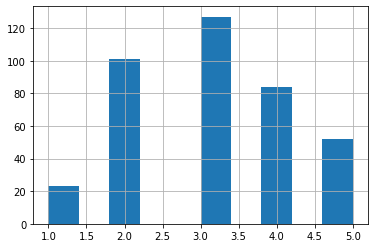

In [45]:
#Столбец goout в котором описано проведение времени с друзьями
df.goout.hist()
pd.DataFrame(df.goout.value_counts())

In [46]:
df.loc[:, ['goout']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
goout    387 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [47]:
#Мы имеем 8 пустых значений, а так же видим две преобладающие велечины 3.0 и 2.0
#Попробуем посмотреть на сколько сильно изменится среднее значение, если мы присвоим 8 значениям "2.0"
df.loc[df.goout.isnull() , 'goout'] = 2.0

In [48]:
df.describe()

,age,m_edu,f_edu,traveltime,studytime,failures,st_gr,famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,395.000000,388.000000,395.000000,393.000000,395.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.517520,1.438692,2.038660,0.318987,-6.115979,3.918987,3.236641,3.083544,3.531579,7.279373,52.262211
std,1.276043,1.098127,1.088808,0.694181,0.842078,0.726244,2.526235,0.886171,0.985860,1.115469,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,4.500000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


Значение изменилось всего на 0.02, возможно в дальнейшем это даст какой то косяк, но количество опыта дает мне права совершать ошибки и учиться на них. Идем дальше.

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


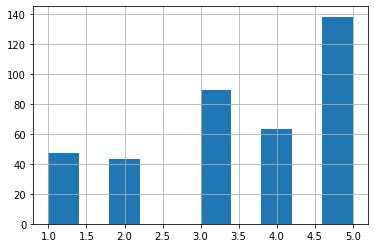

In [49]:
#Столбец health в котором описано текущее состояние здоровья
df.health.hist()
pd.DataFrame(df.health.value_counts())

In [50]:
df.loc[:, ['health']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
health    380 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


У нас имеется 15 пустых значений. Ярко преобладает значение "5.0", а как мы знаем, люди по натуре своей не шибко любят жаловаться на свое здоровье, по этому впринципе можно было бы все 15 значений заполнить "5.0", но пока подождем. Со здоровьем шутки плохи!

In [51]:
#Теперь посмотрим на странный столбец "studytime, granular", который не был указан в описании к заданию
#Так как первое имя у нас есть в таблице, то посмотрим какую зависимость имеют два этих столбца
df.loc[:,['studytime','st_gr']]

,studytime,st_gr
0,2.0,-6.0
1,2.0,-6.0
2,2.0,-6.0
3,3.0,-9.0
4,2.0,-6.0
...,...,...
390,2.0,-6.0
391,1.0,-3.0
392,1.0,-3.0
393,1.0,-3.0


In [52]:
#На первый взгляд, "st_gr" это "studytime" умноженное на -3. Проверяем дальше.
display(pd.DataFrame(df.studytime.value_counts()))
display(pd.DataFrame(df.st_gr.value_counts()))
df['studytime'].corr(df['st_gr'])

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


,st_gr
-6.0,194
-3.0,103
-9.0,64
-12.0,27


-1.0

In [53]:
#По сути это все тот-же "studytime", так что от греха подальше удаляем "st_gr"
df.drop(['st_gr'], inplace = True, axis = 1)

In [54]:
df.loc[:, ['studytime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
studytime    388 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [55]:
#Так, имеем 7 пропусков, а также уверенного фаворита в лице "2.0". Можем смело присваивать пустым значениям "2.0".
#Но, сначала посмотрим как это связано с итоговой "score"
display(df[df.studytime.isnull()])
pd.DataFrame(df[df['score'] >= 65.0].groupby(['score','studytime']).studytime.count())

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
17,GP,F,16,U,GT3,T,3.0,3.0,other,NaN,reputation,mother,3.0,NaN,0.0,yes,NaN,no,yes,yes,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0
91,GP,F,15,U,GT3,T,4.0,3.0,services,other,reputation,mother,1.0,NaN,0.0,no,no,yes,yes,yes,yes,yes,no,4.0,5.0,5.0,1.0,4.0,90.0
112,GP,F,16,U,GT3,NaN,2.0,2.0,at_home,other,NaN,mother,NaN,NaN,1.0,yes,no,no,yes,yes,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0
129,GP,M,16,R,NaN,T,4.0,4.0,teacher,teacher,course,mother,1.0,NaN,0.0,no,no,yes,yes,yes,yes,yes,no,3.0,5.0,5.0,4.0,NaN,90.0
227,GP,M,17,U,LE3,NaN,2.0,3.0,services,services,reputation,father,1.0,NaN,0.0,no,yes,yes,no,no,NaN,yes,no,5.0,3.0,3.0,3.0,NaN,60.0
266,GP,M,17,U,GT3,NaN,3.0,1.0,services,NaN,other,mother,1.0,NaN,0.0,no,no,yes,yes,yes,yes,yes,NaN,5.0,4.0,4.0,NaN,2.0,50.0
314,GP,F,19,U,GT3,T,1.0,1.0,at_home,health,home,other,1.0,NaN,2.0,no,no,no,no,no,yes,yes,yes,4.0,3.0,2.0,3.0,14.0,65.0


studytime
score studytime           
65.0  1.0                9
      2.0               16
      3.0                2
      4.0                2
70.0  1.0                7
      2.0                8
      3.0                9
      4.0                3
75.0  1.0                7
      2.0               16
      3.0                8
      4.0                2
80.0  1.0                4
      2.0                7
      3.0                4
      4.0                1
85.0  2.0                4
      3.0                1
      4.0                1
90.0  1.0                3
      2.0                3
      3.0                2
      4.0                2
95.0  1.0                2
      2.0                1
      3.0                2
100.0 4.0                1

In [56]:
#Видим, что основное количество учащихся имею "2.0", но от "65" баллов мы можем смело и увернно ставить "3.0", а все что ниже "2.0"
#Т.к. ниже "50" преобладает именно "2.0"
df.loc[(df['score'] >= 65.0) & (df.studytime.isnull()) , 'studytime'] = 3.0
df.loc[(df['score'] < 65.0) & (df.studytime.isnull()) , 'studytime'] = 2.0

In [57]:
df.loc[:, ['studytime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
studytime    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [58]:
df.describe()

,age,m_edu,f_edu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,395.000000,395.000000,395.000000,393.000000,395.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.517520,1.438692,2.048101,0.318987,3.918987,3.236641,3.083544,3.531579,7.279373,52.262211
std,1.276043,1.098127,1.088808,0.694181,0.840120,0.726244,0.886171,0.985860,1.115469,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,4.500000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


Пустых значений нет, средняя по этому столбцу увеличилась на 0.01, мы "молодцы", наверное. Идем дальше

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


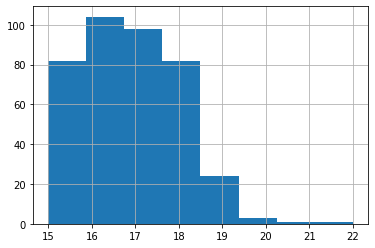

In [59]:
#Столбец age в котором описано возраст ученика
df.age.hist(bins=8)
pd.DataFrame(df.age.value_counts())

In [60]:
df.loc[:, ['age']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
age    395 non-null int64
dtypes: int64(1)
memory usage: 3.2 KB


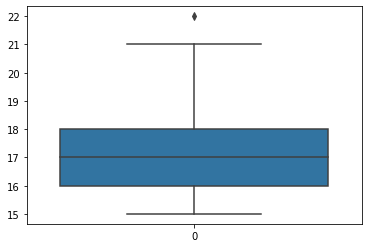

In [61]:
#Пустых значений не имеет, но возможно есть выбросы скорее всего это 22 и 21, но и 20 смущает.
#Будем проверять! Попробую использовать boxplot
sns.boxplot(data=df.age)

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


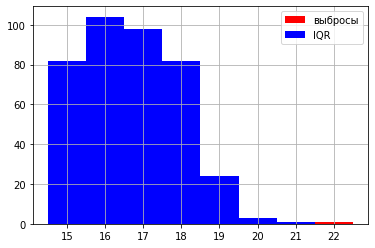

In [62]:
#Видим, что 22 является выбросом, но это не точно, будем уточнять!
median = df.age.median()
IQR = df.age.quantile(0.75) - df.age.quantile(0.25)
perc25 = df.age.quantile(0.25)
perc75 = df.age.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


df.age.loc[df.age <= 22].hist(bins = 8, 
                                  range = (14.5, 22.5), 
                                  color = 'red',
                                  label = 'выбросы')

df.age.loc[df.age.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 8, 
                                                                        range = (14.5, 22.5),
                                                                        color = 'blue',
                                                                        label = 'IQR')

plt.legend();

In [63]:
#Что ж, не вижу повода не выкинуть значение "22". 
df.loc[df['age'] == 22.0, 'age'] = np.nan

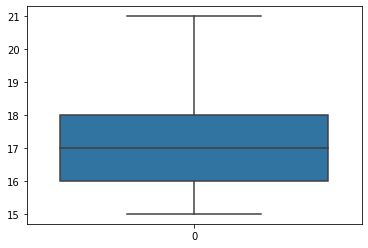

In [64]:
#Свнова смотрим boxplot
sns.boxplot(data=df.age)

По итогу мы видим, что большее количество учеников распологается между 16-18 годами. Крайнии границы это 21 и 15. Также, мы нашли, что возраст 22 является "выбросом". Ученики старше 18 лет это скорее всего те, кто отставал по учубе и был оставлен либо на второй год, либо, как это чаще всего бывает, связано со здоровьем.

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


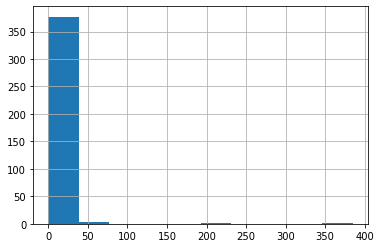

In [65]:
#Столбец absences в котором описано количество пропущенных занятий
df.absences.hist()
pd.DataFrame(df.absences.value_counts())

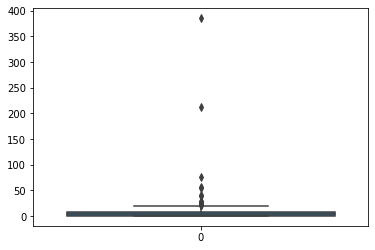

In [66]:
#Видно, что есть выбросы, причем сильные
#Используем boxplot
sns.boxplot(data=df.absences)

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


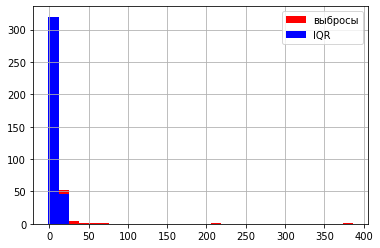

In [67]:
#Повторяем действия, которые выполняли со столбцом "age"
median = df.absences.median()
IQR = df.absences.quantile(0.75) - df.absences.quantile(0.25)
perc25 = df.absences.quantile(0.25)
perc75 = df.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


df.absences.loc[df.absences <= 385].hist(bins = 30, 
                                  range = (-1, 386), 
                                  color = 'red',
                                  label = 'выбросы')

df.absences.loc[df.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 30, 
                                                                        range = (-1, 386),
                                                                        color = 'blue',
                                                                        label = 'IQR')

plt.legend();

In [68]:
#Так, выбросов, оказалось больше, чем я думал.
#Можно применить логарифмирование и проверить распределение на логонормальность
#Так просто оно не вышло, доавил смещение
epsilon = 0.001
df_absences_ln = df.absences.apply(lambda x: math.log(x+epsilon))

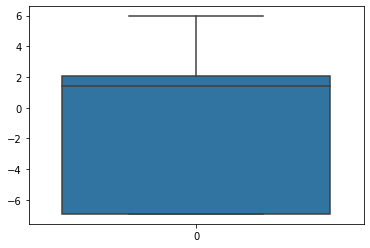

In [69]:
sns.boxplot(data=df_absences_ln)

In [70]:
#Выбросы пропали, ура.
df.loc[:, ['absences']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
absences    383 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [71]:
#Попробовав группировать по разным параметрам, так и не смог найти какой то определнной связи.
#Вариант со сводной таблицей тоже не помог
display(df[df.absences.isnull()])
pd.DataFrame(df.groupby(['health','absences']).health.count())

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
24,GP,F,15.0,R,GT3,T,2.0,4.0,services,health,course,mother,1.0,3.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,NaN,40.0
101,GP,M,16.0,U,GT3,T,4.0,4.0,services,teacher,other,father,1.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,yes,4.0,4.0,3.0,4.0,NaN,85.0
120,GP,F,15.0,U,GT3,T,1.0,2.0,at_home,NaN,course,mother,1.0,2.0,0.0,no,no,no,no,no,yes,yes,no,3.0,2.0,3.0,1.0,NaN,75.0
129,GP,M,16.0,R,NaN,T,4.0,4.0,teacher,teacher,course,mother,1.0,3.0,0.0,no,no,yes,yes,yes,yes,yes,no,3.0,5.0,5.0,4.0,NaN,90.0
150,GP,M,18.0,U,LE3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,yes,no,yes,yes,2.0,3.0,5.0,4.0,NaN,0.0
172,GP,M,17.0,U,NaN,T,4.0,4.0,teacher,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,4.0,4.0,4.0,5.0,NaN,50.0
215,GP,F,17.0,U,LE3,T,3.0,2.0,other,other,reputation,mother,2.0,2.0,0.0,no,no,NaN,no,yes,yes,NaN,no,4.0,4.0,4.0,1.0,NaN,75.0
227,GP,M,17.0,U,LE3,NaN,2.0,3.0,services,services,reputation,father,1.0,2.0,0.0,no,yes,yes,no,no,NaN,yes,no,5.0,3.0,3.0,3.0,NaN,60.0
254,GP,M,17.0,NaN,NaN,T,2.0,1.0,other,other,course,mother,1.0,1.0,0.0,no,no,no,no,no,yes,yes,no,4.0,4.0,2.0,5.0,NaN,60.0
265,GP,M,18.0,R,LE3,NaN,3.0,4.0,NaN,other,reputation,mother,2.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,4.0,2.0,5.0,1.0,NaN,85.0


health
health absences        
1.0    0.0           13
       2.0            7
       4.0            6
       5.0            1
       6.0            4
...                 ...
5.0    23.0           1
       28.0           1
       30.0           1
       54.0           1
       75.0           1

[87 rows x 1 columns]

12 пустых значений. Единственное, что точно понятно, что распределение признака логонормальное, нет выбросов. К сожаление не удалось заполнить поля, так как не смог найти какой то явной зависимости(и так и так крутил, не хватает чего то). Идем дальше!

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


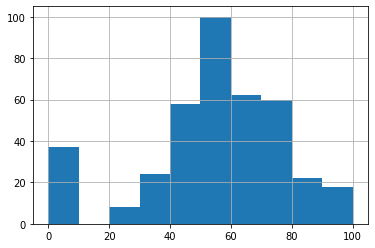

In [72]:
#Главный столбец score в котором описаны балы по гомэкзамену по математике
df.score.hist()
pd.DataFrame(df.score.value_counts())

In [73]:
df.loc[:, ['score']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
score    389 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


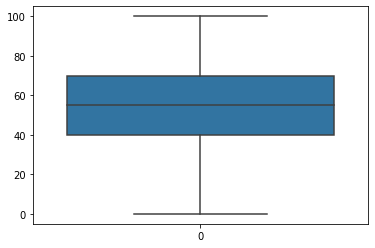

In [74]:
#Пока не вижу ничего плохого пропусков 6.
#Посмотрим boxplot
sns.boxplot(data=df.score)

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 70.0,  Границы выбросов: [-65.0, 175.0].


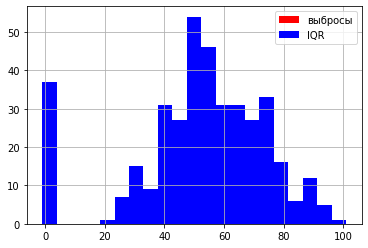

In [75]:
#Делаем все как в предыдущих шагах
median = df.score.median()
IQR = df.score.quantile(0.75) - df.absences.quantile(0.25)
perc25 = df.score.quantile(0.25)
perc75 = df.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


df.score.loc[df.score <= 101].hist(bins = 21, 
                                  range = (-1, 101), 
                                  color = 'red',
                                  label = 'выбросы')

df.score.loc[df.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 21, 
                                                                        range = (-1, 101),
                                                                        color = 'blue',
                                                                        label = 'IQR')

plt.legend();

In [76]:
df.score.describe()

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

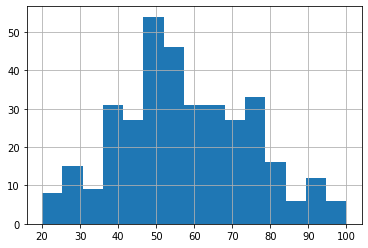

In [77]:
#Ситуация с 0 конечно мазолит глаз, поэтому попробуем посмотреть распределение без 0
score_non_zero = df.score.apply(lambda x: x if x>0 else np.nan)
score_non_zero.hist(bins = 15)

C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


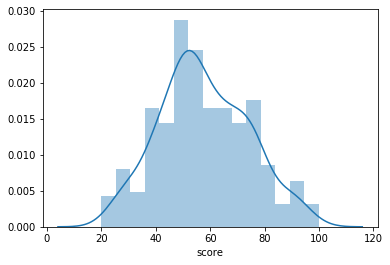

In [78]:
sns.distplot(score_non_zero, bins = 15)

25-й перцентиль: 45.0, 75-й перцентиль: 70.0, IQR: 25.0,  Границы выбросов: [7.5, 107.5].


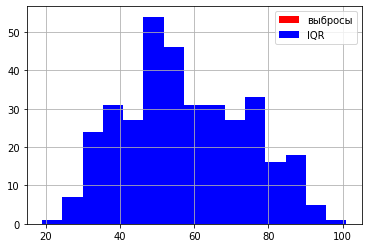

In [79]:
#Повторяем прошлый шаг, но уже без 0
median = score_non_zero.median()
IQR = score_non_zero.quantile(0.75) - score_non_zero.quantile(0.25)
perc25 = score_non_zero.quantile(0.25)
perc75 = score_non_zero.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


score_non_zero.loc[score_non_zero <= 101].hist(bins = 15, 
                                  range = (19, 101), 
                                  color = 'red',
                                  label = 'выбросы')

score_non_zero.loc[score_non_zero.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 15, 
                                                                        range = (19, 101),
                                                                        color = 'blue',
                                                                        label = 'IQR')

plt.legend();

In [80]:
score_non_zero.describe()

count    352.000000
mean      57.755682
std       16.200928
min       20.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

Видим, что без 0 минимальная граница выброса равна 7.5. До этого минимальная граница была -65.0. Дисперсия увеличина и распределение выглядит вытянутым по бокам. Складывается понимание, что 0 это снова человеческий фактор или машинный(загрузка данных), т.к. очень сомнительно, что 37 учениеков получили 0.0, да и что это вообще возможно.
"Нули" можно вывести как второе распределение, хотя от них можно было бы избавиться, но меня отговорили.

In [81]:
#Создаем булевый stud['no_score'] = stud.score.apply(lambda x: None if pd.isnull(x) else 1 if x==0 else 0)критерий "zero"
df['zero'] = df.score.apply(lambda x: None if pd.isnull(x) else 1 if x==0 else 0)

In [82]:
display(df.head())
df['zero'].value_counts()

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score,zero
0,GP,F,18.0,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0,0.0
1,GP,F,17.0,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0,0.0
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0,0.0
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0,0.0
4,GP,F,16.0,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0,0.0


0.0    352
1.0     37
Name: zero, dtype: int64

In [83]:
#Удаляем 0
df.loc[df['score'] == 0.0, 'score'] = np.nan

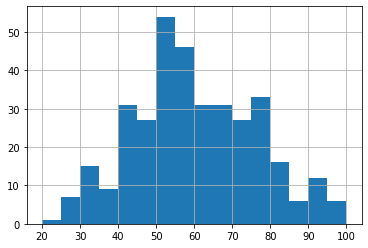

In [84]:
df.score.hist(bins=16)

Одельно нужно высказаться по двум значениям:
1. score- Достаточно большая дисперсия с нормальным распределением, выбросов нет. В следствии добавления нового признака увеличилось количество пропусков до 43.
2. zero - Булевой признак, пропусков всего 6.

Теперь возьмемся за категориальные признаки и попробуем их привести к единообразию.

In [85]:
#Проверяем, что в столбцах есть только 2 значения.
display((df.schoolsup.value_counts()),
(df.famsup.value_counts()),
(df.paid.value_counts()),
(df.activities.value_counts()),
(df.nursery.value_counts()),
(df.higher.value_counts()),
(df.internet.value_counts()),
(df.romantic.value_counts()),
(df.sex.value_counts()),
(df.address.value_counts()),
(df.famsize.value_counts()),
(df.p_status.value_counts()))

no     335
yes     51
Name: schoolsup, dtype: int64

yes    219
no     137
Name: famsup, dtype: int64

no     200
yes    155
Name: paid, dtype: int64

yes    195
no     186
Name: activities, dtype: int64

yes    300
no      79
Name: nursery, dtype: int64

yes    356
no      19
Name: higher, dtype: int64

yes    305
no      56
Name: internet, dtype: int64

no     240
yes    124
Name: romantic, dtype: int64

F    208
M    187
Name: sex, dtype: int64

U    295
R     83
Name: address, dtype: int64

GT3    261
LE3    107
Name: famsize, dtype: int64

T    314
A     36
Name: p_status, dtype: int64

In [86]:
#Видим, что значений и правда, только 2
#Создадим словарь из возможных вариантов и присвои им "0" или "1"
# Переведем строки в числа при помощи словаря и метода map

binary_lists = {'F': 1,'M': 0, 'U': 1, 'R': 0, 'GT3': 1, 'LE3': 0, 'T': 1, 'A': 0, 'yes': 1, 'no': 0}

df['sex'] = df['sex'].map(binary_lists)
df['schoolsup']= df['schoolsup'].map(binary_lists)
df['famsup'] = df['famsup'].map(binary_lists)
df['paid']= df['paid'].map(binary_lists)
df['activities'] = df['activities'].map(binary_lists)
df['nursery']= df['nursery'].map(binary_lists)
df['higher'] = df['higher'].map(binary_lists)
df['internet']= df['internet'].map(binary_lists)
df['romantic'] = df['romantic'].map(binary_lists)
df['address']= df['address'].map(binary_lists)
df['famsize'] = df['famsize'].map(binary_lists)
df['p_status']= df['p_status'].map(binary_lists)

In [87]:
#Проверим, что все правильно получилось
display((df.schoolsup.value_counts()),
(df.famsup.value_counts()),
(df.paid.value_counts()),
(df.activities.value_counts()),
(df.nursery.value_counts()),
(df.higher.value_counts()),
(df.internet.value_counts()),
(df.romantic.value_counts()),
(df.sex.value_counts()),
(df.address.value_counts()),
(df.famsize.value_counts()),
(df.p_status.value_counts()))

0.0    335
1.0     51
Name: schoolsup, dtype: int64

1.0    219
0.0    137
Name: famsup, dtype: int64

0.0    200
1.0    155
Name: paid, dtype: int64

1.0    195
0.0    186
Name: activities, dtype: int64

1.0    300
0.0     79
Name: nursery, dtype: int64

1.0    356
0.0     19
Name: higher, dtype: int64

1.0    305
0.0     56
Name: internet, dtype: int64

0.0    240
1.0    124
Name: romantic, dtype: int64

1    208
0    187
Name: sex, dtype: int64

1.0    295
0.0     83
Name: address, dtype: int64

1.0    261
0.0    107
Name: famsize, dtype: int64

1.0    314
0.0     36
Name: p_status, dtype: int64

In [88]:
#Создадим список и столбцов, чтобы подсчитать количество пропусков
binary_in_frame = ['sex', 'address', 'famsize', 'p_status', 
                   'schoolsup', 'famsup', 'paid', 'activities', 
                   'nursery', 'higher', 'internet', 'romantic']

temp = df[binary_in_frame].describe()

In [89]:
395-temp.T['count']

sex            0.0
address       17.0
famsize       27.0
p_status      45.0
schoolsup      9.0
famsup        39.0
paid          40.0
activities    14.0
nursery       16.0
higher        20.0
internet      34.0
romantic      31.0
Name: count, dtype: float64

In [90]:
df[binary_in_frame].describe()

,sex,address,famsize,p_status,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395.000000,378.000000,368.000000,350.000000,386.000000,356.000000,355.000000,381.000000,379.000000,375.000000,361.000000,364.000000
mean,0.526582,0.780423,0.709239,0.897143,0.132124,0.615169,0.436620,0.511811,0.791557,0.949333,0.844875,0.340659
std,0.499926,0.414509,0.454732,0.304207,0.339065,0.487240,0.496667,0.500518,0.406732,0.219609,0.362526,0.474583
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [91]:
#Посмотрев среднии значения "schoolsup", "address", "nursery".
#Посмотрим на "schoolsup" подробнее.
#Сгруппирунем два столбца, чтобы посмотреть кто больше пользуется доп занятиями.
display(df[df.schoolsup.isnull()])
pd.DataFrame(df.groupby(['schoolsup','address']).schoolsup.count())

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score,zero
27,GP,0,15.0,1.0,1.0,1.0,4.0,2.0,health,services,other,mother,1.0,1.0,0.0,NaN,0.0,1.0,0.0,1.0,1.0,1.0,NaN,2.0,2.0,4.0,1.0,4.0,75.0,0.0
35,GP,1,15.0,1.0,1.0,1.0,2.0,3.0,other,other,other,father,NaN,1.0,0.0,NaN,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,5.0,1.0,5.0,0.0,30.0,0.0
79,GP,1,16.0,1.0,NaN,1.0,3.0,4.0,at_home,other,course,mother,1.0,2.0,0.0,NaN,1.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,4.0,3.0,3.0,12.0,25.0,0.0
151,GP,0,16.0,1.0,0.0,1.0,2.0,1.0,at_home,NaN,course,mother,1.0,1.0,1.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,1.0,4.0,4.0,4.0,5.0,6.0,70.0,0.0
211,GP,0,17.0,1.0,0.0,1.0,4.0,4.0,services,other,home,mother,1.0,2.0,0.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,1.0,5.0,3.0,5.0,3.0,13.0,65.0,0.0
274,GP,1,17.0,1.0,1.0,1.0,2.0,4.0,at_home,health,reputation,mother,2.0,2.0,0.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,1.0,4.0,3.0,3.0,1.0,2.0,50.0,0.0
321,GP,1,17.0,1.0,1.0,1.0,2.0,2.0,other,other,course,mother,1.0,2.0,0.0,NaN,1.0,0.0,0.0,1.0,1.0,0.0,1.0,4.0,2.0,2.0,3.0,12.0,45.0,0.0
392,MS,0,21.0,0.0,1.0,1.0,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,5.0,5.0,3.0,3.0,3.0,35.0,0.0
394,MS,0,19.0,1.0,0.0,1.0,1.0,1.0,other,at_home,NaN,father,1.0,1.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,2.0,3.0,5.0,5.0,45.0,0.0


schoolsup
schoolsup address           
0.0       0.0             73
          1.0            247
1.0       0.0              9
          1.0             40

In [92]:
#Получается, что больше всего пользуются те, кто живет в городе из тех значений, что у нас пустые
#Мы видим, что 8 из 9 человек из города, но по факту, даже те, кто из города мало пользуются доп занятиями
#Посмотрим как это связано с итоговым балом
display(pd.DataFrame(df[df['score'] <= 50.0].groupby(['schoolsup','address']).schoolsup.count()),
       pd.DataFrame(df[df['score'] >= 50.0].groupby(['schoolsup','address']).schoolsup.count()))

schoolsup
schoolsup address           
0.0       0.0             31
          1.0             75
1.0       0.0              7
          1.0             22

schoolsup
schoolsup address           
0.0       0.0             47
          1.0            173
1.0       0.0              4
          1.0             21

In [93]:
#Получается, что доп занятия на оценку почти не влияют, на первый взгляд, так что можно смело присваивать
# для пустых значений- "0.0"
df.loc[df.schoolsup.isnull() , 'schoolsup'] = 0.0

In [94]:
#Теперь попробуем сгруппирвоать адрес и traveltime, если из деревни, то ехать ему придется дольше остальных

display(df[df.address.isnull()])
pd.DataFrame(df.groupby(['traveltime','address']).address.count())

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score,zero
6,GP,0,16.0,NaN,0.0,1.0,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,4.0,4.0,4.0,3.0,0.0,55.0,0.0
52,GP,0,15.0,NaN,0.0,0.0,4.0,2.0,health,NaN,other,father,2.0,1.0,1.0,0.0,NaN,0.0,0.0,1.0,1.0,NaN,0.0,5.0,5.0,5.0,5.0,6.0,50.0,0.0
75,GP,0,15.0,NaN,1.0,1.0,4.0,3.0,teacher,other,home,mother,1.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,4.0,3.0,3.0,5.0,6.0,50.0,0.0
92,GP,1,16.0,NaN,0.0,1.0,NaN,1.0,other,other,home,father,1.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,2.0,2.0,4.0,30.0,0.0
96,GP,0,16.0,NaN,1.0,NaN,4.0,3.0,services,other,reputation,mother,2.0,1.0,0.0,1.0,1.0,NaN,1.0,0.0,NaN,1.0,0.0,3.0,3.0,3.0,4.0,2.0,75.0,0.0
159,GP,0,16.0,NaN,1.0,1.0,3.0,NaN,other,services,course,father,1.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,4.0,5.0,5.0,5.0,4.0,60.0,0.0
168,GP,1,16.0,NaN,1.0,1.0,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,5.0,1.0,5.0,4.0,0.0,NaN,1.0
241,GP,0,17.0,NaN,0.0,0.0,4.0,4.0,teacher,other,course,mother,NaN,2.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,2.0,4.0,2.0,60.0,0.0
254,GP,0,17.0,NaN,NaN,1.0,2.0,1.0,other,other,course,mother,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,4.0,2.0,5.0,NaN,60.0,0.0
270,GP,1,19.0,NaN,1.0,1.0,3.0,3.0,other,services,home,other,1.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,4.0,3.0,5.0,5.0,NaN,NaN,NaN


address
traveltime address         
1.0        0.0           34
           1.0          200
2.0        0.0           26
           1.0           65
3.0        0.0           12
           1.0            9
4.0        0.0            4
           1.0            3

In [95]:
#Почти так и получилось, но тут напрашивается вывод, что школа скорее всего находится на окраине
#Выведем пустые значиния в отдельный фрейм
D=df[df.address.isnull()]
display(len(D[D.traveltime > 2.0]),#Посмотрели, что те, кто добираются до школы больше "2.0" 
       len(D[D.traveltime <= 2.0]))#Посмотрели, что те, кто добираются до школы меньше либо равно "2.0"
                                   #живут в городе

1

13

In [96]:
#Присваиваем значения
df.loc[(df['traveltime'] > 2.0) & (df.address.isnull()) , 'address'] = 0.0
df.loc[(df['traveltime'] <= 2.0) & (df.address.isnull()) , 'address'] = 1.0

In [97]:
df.address.value_counts()

1.0    308
0.0     84
Name: address, dtype: int64

# пустыми остались 3 значения, которые также не имеют и traveltime

In [98]:
#Теперь попробуем разобраться с пропусками в nursery
#Попробуем сгруппирвать с traveltime, т.к. скорее всего садик находится обычно в городе и не очень далеко от школы
#Соответсвенно можно грубо прировнять дорогу до садика и дорогу до школы
display(df[df.nursery.isnull()])
pd.DataFrame(df.groupby(['traveltime','nursery']).nursery.count())

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score,zero
22,GP,0,16.0,1.0,0.0,1.0,4.0,2.0,teacher,NaN,course,mother,1.0,2.0,0.0,0.0,NaN,0.0,1.0,NaN,1.0,1.0,0.0,4.0,5.0,1.0,5.0,2.0,80.0,0.0
32,GP,0,15.0,0.0,NaN,1.0,4.0,3.0,teacher,at_home,course,mother,1.0,2.0,0.0,0.0,1.0,0.0,1.0,NaN,1.0,1.0,1.0,4.0,3.0,2.0,5.0,0.0,80.0,0.0
85,GP,1,15.0,1.0,1.0,1.0,4.0,4.0,services,services,reputation,father,2.0,2.0,2.0,0.0,0.0,1.0,0.0,NaN,1.0,1.0,1.0,4.0,4.0,4.0,5.0,6.0,40.0,0.0
88,GP,0,16.0,1.0,1.0,1.0,2.0,2.0,NaN,other,reputation,father,2.0,2.0,1.0,0.0,0.0,1.0,1.0,NaN,1.0,1.0,0.0,4.0,4.0,2.0,NaN,12.0,50.0,0.0
152,GP,1,15.0,0.0,1.0,1.0,3.0,3.0,services,NaN,reputation,other,2.0,3.0,2.0,0.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,4.0,2.0,1.0,3.0,8.0,50.0,0.0
212,GP,1,16.0,1.0,1.0,0.0,2.0,2.0,other,other,reputation,mother,1.0,2.0,0.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,0.0,3.0,3.0,4.0,4.0,0.0,70.0,0.0
249,GP,0,16.0,1.0,1.0,1.0,0.0,2.0,other,other,other,mother,1.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN,1.0,1.0,0.0,4.0,3.0,2.0,5.0,0.0,75.0,0.0
300,GP,1,18.0,1.0,0.0,0.0,4.0,4.0,health,other,home,mother,1.0,2.0,0.0,0.0,1.0,0.0,0.0,NaN,1.0,1.0,1.0,4.0,2.0,4.0,4.0,14.0,55.0,0.0
332,GP,1,18.0,1.0,1.0,1.0,3.0,3.0,services,services,home,mother,1.0,2.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,0.0,5.0,3.0,4.0,4.0,0.0,NaN,1.0
336,GP,1,19.0,0.0,1.0,0.0,3.0,1.0,services,NaN,home,other,1.0,3.0,1.0,0.0,0.0,1.0,0.0,NaN,1.0,0.0,0.0,5.0,4.0,3.0,5.0,12.0,65.0,0.0


nursery
traveltime nursery         
1.0        0.0           44
           1.0          189
2.0        0.0           21
           1.0           69
3.0        0.0            6
           1.0           15
4.0        0.0            1
           1.0            6

In [99]:
#И правда, мы видим, что тем кому добираться до школы ближе, ходили в садик!
#Теперь проделаем все как и в прошлый раз
O=df[df.nursery.isnull()]
display(len(O[O.traveltime > 2.0]),
       len(O[O.traveltime <= 2.0]))

1

15

In [100]:
#Присваиваем значения
df.loc[(df['traveltime'] > 2.0) & (df.nursery.isnull()) , 'nursery'] = 0.0
df.loc[(df['traveltime'] <= 2.0) & (df.nursery.isnull()) , 'nursery'] = 1.0

In [101]:
df.nursery.value_counts()

1.0    315
0.0     80
Name: nursery, dtype: int64

Пропусков нет!
Привел все критерии к числовым значениям, в стобцах  (famsize, Pstatus, famsup, paid, activities, higher, internet, romantic) не удалось избавиться от пропусков. Значения без яных перекосов, поэтому выделить что-то одно или адекватно распределить на данный момент не видится возможным.

Приступаем к корреляционный анализ:

Выясним, какие столбцы коррелируют с score. Посмотрим какие параметры стоит оставить для модели, а какие исключить

In [102]:
df_value = df[['age', 'absences', 'score']]

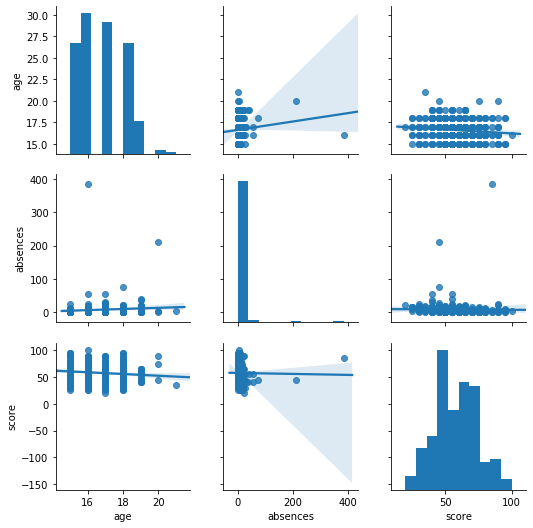

In [103]:
sns.pairplot(df_value, kind = 'reg')

In [104]:
#Матрица корреляции
df_value.corr()

,age,absences,score
age,1.000000,0.091656,-0.121579
absences,0.091656,1.000000,-0.014039
score,-0.121579,-0.014039,1.000000


Есть обратная корреляция с возрастом, чем выше возраст тем ниже score

Рассмотрим категориальные переменные

In [105]:
#Отдельно выделим эти переменные
binary_columns = ('m_edu', 'f_edu', 'm_job', 'f_job',
                            'reason', 'guardian', 'traveltime', 'studytime',
                            'failures', 'famrel', 'freetime', 'goout', 'health')
binary_in_frame = ['sex', 'address', 'famsize', 'p_status', 
                   'schoolsup', 'famsup', 'paid', 'activities', 
                   'nursery', 'higher', 'internet', 'romantic','school']
list_of_all_columns=[]
list_of_all_columns.extend(binary_columns)
list_of_all_columns.extend(binary_in_frame)

In [106]:
#Анализ бинарных переменных
# функция для бинарных
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (10, 3))
    sns.boxplot(x=column, y='score', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

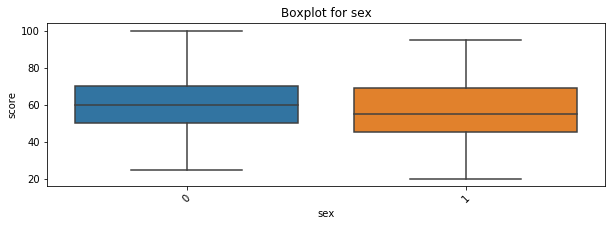

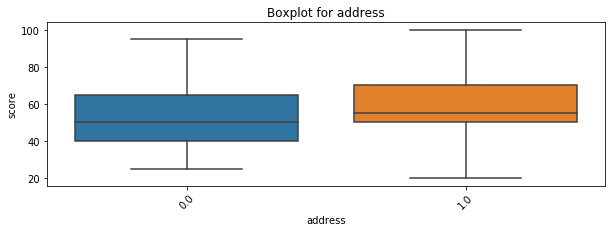

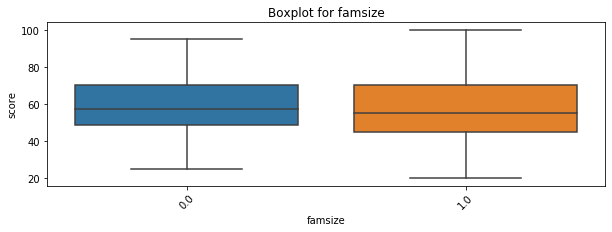

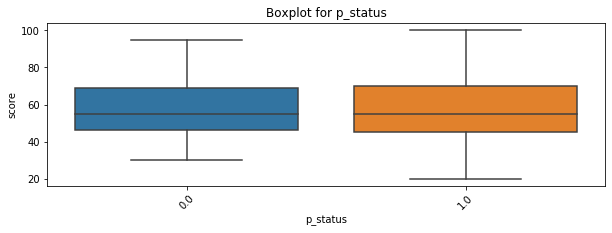

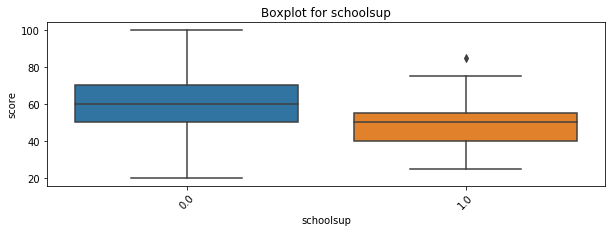

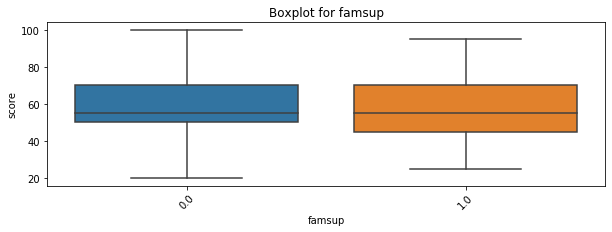

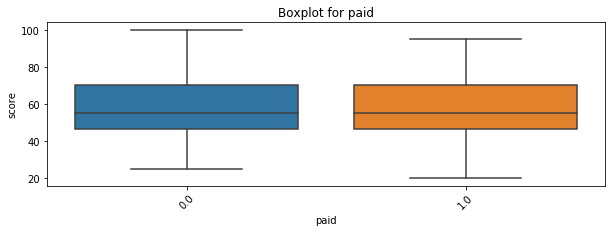

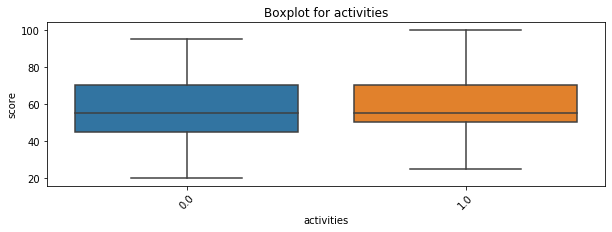

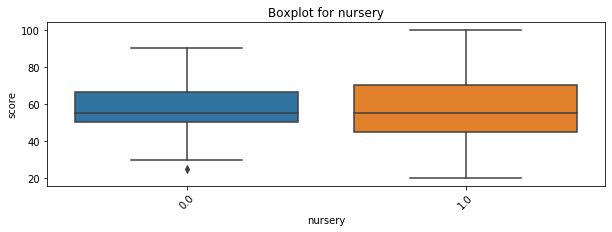

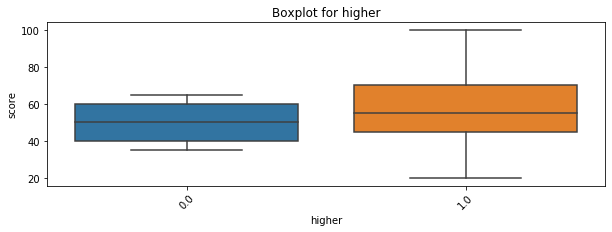

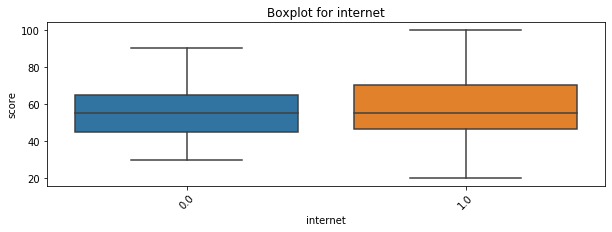

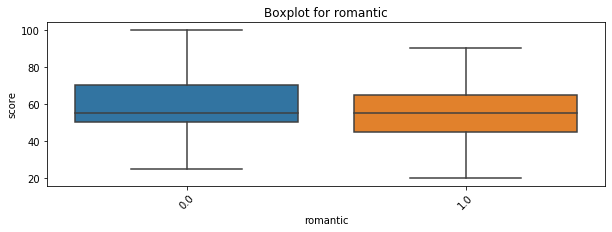

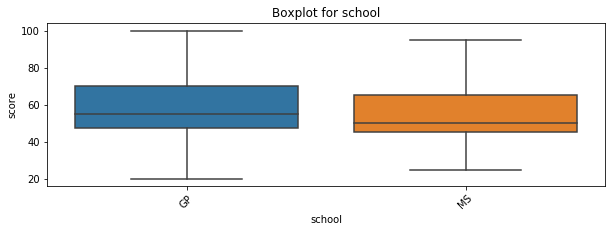

In [107]:
for col in binary_in_frame:
    get_boxplot(col)

Видим что есть выбросы в "schoolsup", "nursery","higher".
Что на это все скажет тест Стюдентса

#   Оценочные категориальные признаки

In [108]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (12, 4))
    sns.boxplot(x=column, y='score', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

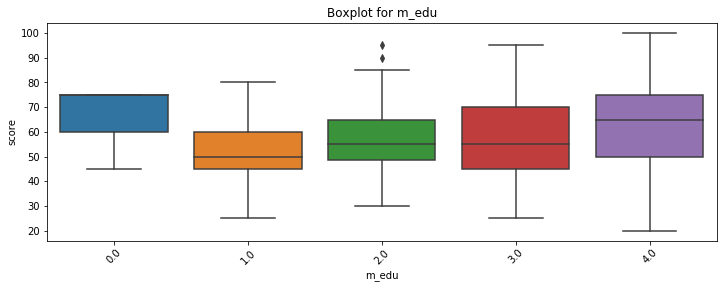

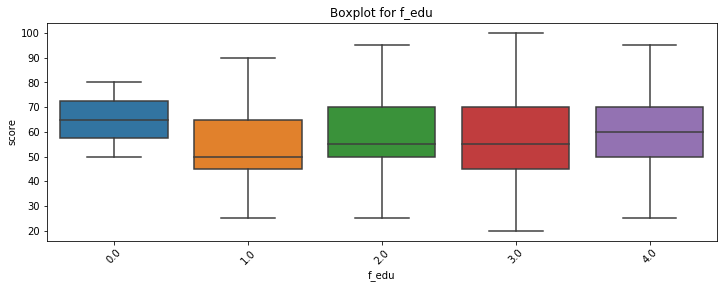

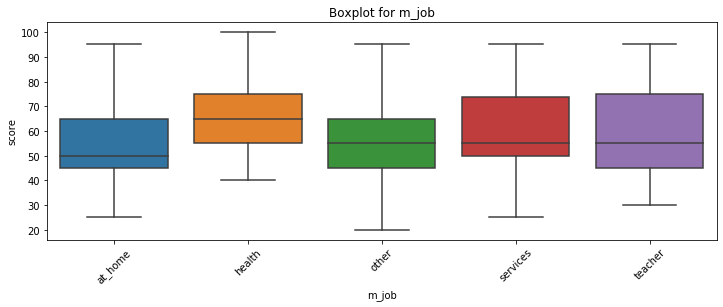

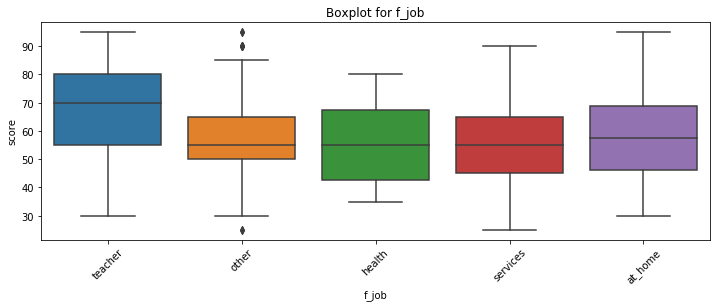

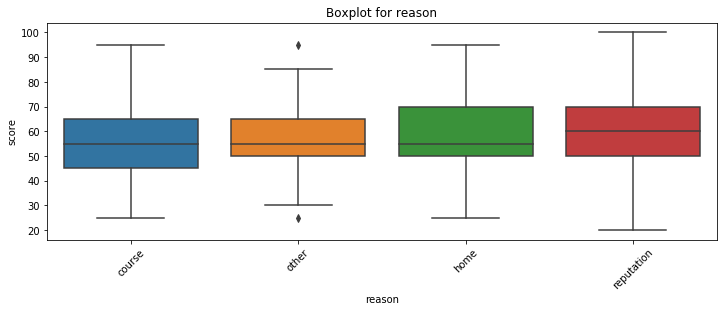

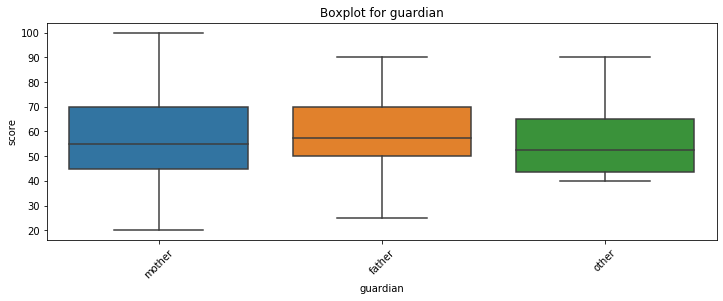

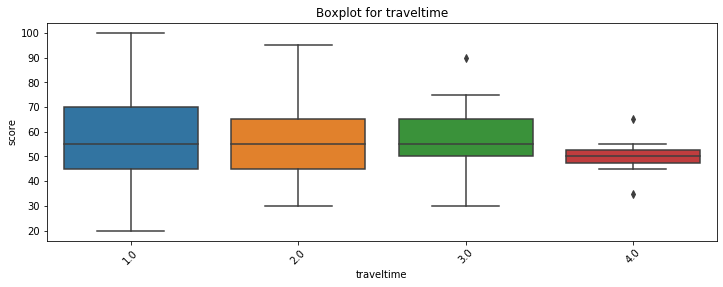

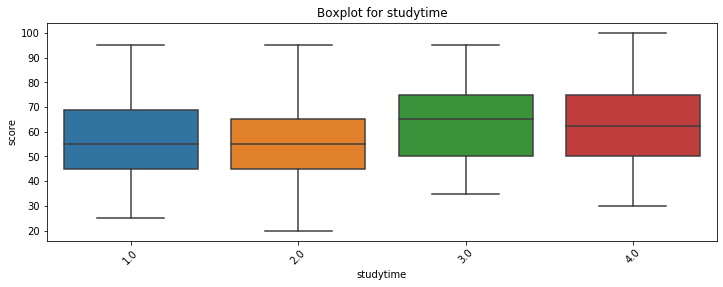

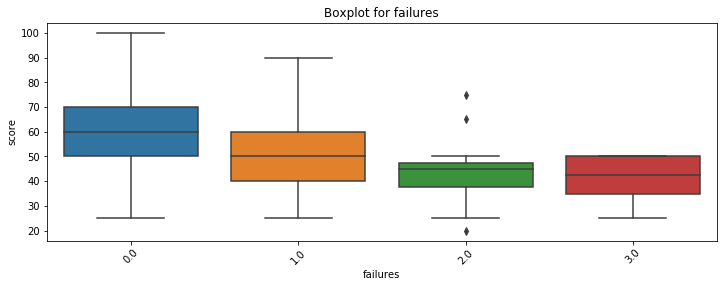

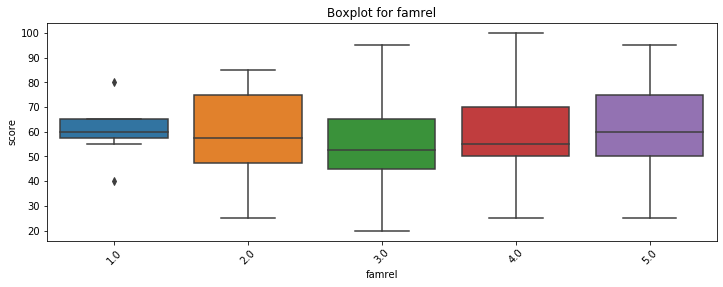

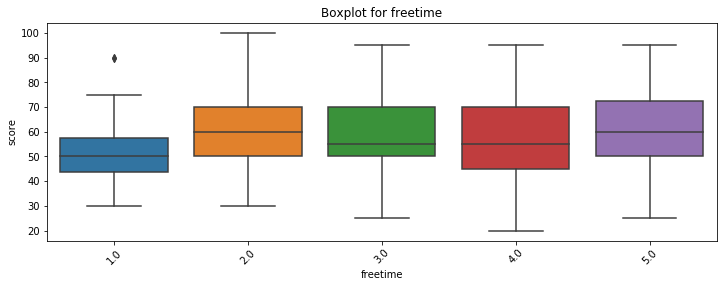

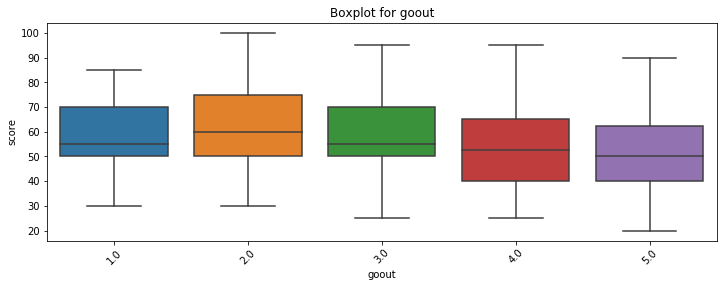

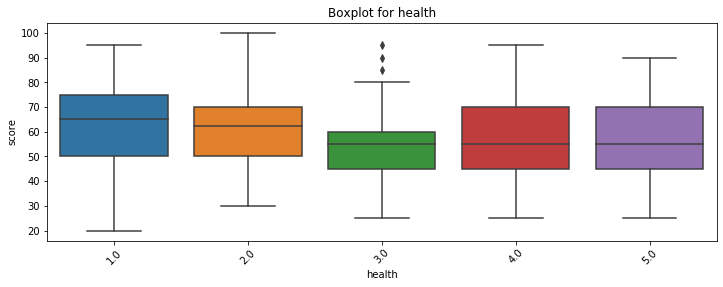

In [109]:
for col in binary_columns:
    get_boxplot(col)

Видим что есть выбросы в "m_edu","f_edu","m_job","f_job","studytime","failures","goout","health"
Что на это все скажет тест Стюдентса

# Тест Стьюдента по всем категориальным признакам

In [110]:
# Проверим, есть ли статистическая разница в распределении оценок по всем категориальным признакам, 
# с помощью теста Стьюдента. Проверим нулевую гипотезу о том, 
# что распределения score по различным параметрам неразличимы:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        ttest = ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'].dropna(),
                          df.loc[df.loc[:, column] == comb[1], 'score'].dropna()).pvalue
        if  ttest<= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('!!!Найдены статистически значимые различия для колонки', column)
            break

In [111]:
for elem in list_of_all_columns:
    get_stat_dif(elem)

!!!Найдены статистически значимые различия для колонки m_edu
!!!Найдены статистически значимые различия для колонки f_edu
!!!Найдены статистически значимые различия для колонки m_job
!!!Найдены статистически значимые различия для колонки f_job
!!!Найдены статистически значимые различия для колонки studytime
!!!Найдены статистически значимые различия для колонки failures
!!!Найдены статистически значимые различия для колонки address
!!!Найдены статистически значимые различия для колонки schoolsup


9 параметров: address, schoolsup, m_edu, f_edu, m_job, f_job, studytime, failures, goout. Оставляем для дальнейшего построения модели.

In [112]:
#Построим для нашей новой переменной zero
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        ttest = ttest_ind(df.loc[df.loc[:, column] == comb[0], 'zero'].dropna(),
                          df.loc[df.loc[:, column] == comb[1], 'zero'].dropna()).pvalue
        if  ttest<= 0.05/len(combinations_all): # поправкf Бонферони
            print('!!!Найдены статистически значимые различия для колонки', column)
            break

In [113]:
for elem in list_of_all_columns:
    get_stat_dif(elem)

!!!Найдены статистически значимые различия для колонки failures
!!!Найдены статистически значимые различия для колонки paid
!!!Найдены статистически значимые различия для колонки higher
!!!Найдены статистически значимые различия для колонки romantic


4 параметра: paid, higher, romantic, failures. Оставляем в модели.

По итогу я получиль 14  переменных , которые, так или иначе оказывают влияние на score: age, absences,address, schoolsup, m_edu, f_edu, m_job, f_job, studytime, failures, goout, paid, higher, romantic

In [114]:
#Соберем все воедино!
importan_for_model = df.loc[:, ['age', 'absences', 'address', 'schoolsup', 
                              'm_edu', 'f_edu', 'm_job', 'f_job', 
                              'studytime', 'failures', 'goout', 'paid', 
                              'higher', 'romantic', 'score', 'zero']]

In [115]:
importan_for_model.head()

,age,absences,address,schoolsup,m_edu,f_edu,m_job,f_job,studytime,failures,goout,paid,higher,romantic,score,zero
0,18.0,6.0,1.0,1.0,4.0,4.0,at_home,teacher,2.0,0.0,4.0,0.0,1.0,0.0,30.0,0.0
1,17.0,4.0,1.0,0.0,1.0,1.0,at_home,other,2.0,0.0,3.0,0.0,1.0,0.0,30.0,0.0
2,15.0,10.0,1.0,1.0,1.0,1.0,at_home,other,2.0,3.0,2.0,NaN,1.0,NaN,50.0,0.0
3,15.0,2.0,1.0,0.0,4.0,2.0,health,NaN,3.0,0.0,2.0,1.0,1.0,1.0,75.0,0.0
4,16.0,4.0,1.0,0.0,3.0,3.0,other,other,2.0,0.0,2.0,1.0,1.0,0.0,50.0,0.0


In [116]:
importan_for_model.corr()

,age,absences,address,schoolsup,m_edu,f_edu,studytime,failures,goout,paid,higher,romantic,score,zero
age,1.000000,0.091656,-0.158417,-0.253423,-0.167883,-0.152024,-0.004015,0.196777,0.115022,-0.020801,-0.167505,0.132071,-0.121579,0.103534
absences,0.091656,1.000000,0.022988,0.109803,-0.011944,0.022572,-0.026083,0.057952,-0.045795,-0.015179,-0.010499,0.000414,-0.014039,-0.100701
address,-0.158417,0.022988,1.000000,0.035641,0.159508,0.081957,-0.047079,-0.102542,0.062817,0.058577,0.055116,-0.007054,0.137977,-0.043783
schoolsup,-0.253423,0.109803,0.035641,1.000000,-0.038350,0.049758,0.040912,0.007616,-0.035651,-0.028131,0.054845,-0.069336,-0.239106,-0.096672
m_edu,-0.167883,-0.011944,0.159508,-0.038350,1.000000,0.625516,0.077481,-0.245587,0.067820,0.178744,0.176596,0.023870,0.186477,-0.127218
f_edu,-0.152024,0.022572,0.081957,0.049758,0.625516,1.000000,0.012538,-0.267978,0.046900,0.101455,0.187323,0.010062,0.135268,-0.060536
studytime,-0.004015,-0.026083,-0.047079,0.040912,0.077481,0.012538,1.000000,-0.158328,-0.050341,0.199222,0.175990,0.054913,0.155147,-0.038534
failures,0.196777,0.057952,-0.102542,0.007616,-0.245587,-0.267978,-0.158328,1.000000,0.114272,-0.177665,-0.273051,0.090520,-0.286925,0.228864
goout,0.115022,-0.045795,0.062817,-0.035651,0.067820,0.046900,-0.050341,0.114272,1.000000,0.032331,-0.027004,0.019542,-0.172534,0.017631
paid,-0.020801,-0.015179,0.058577,-0.028131,0.178744,0.101455,0.199222,-0.177665,0.032331,1.000000,0.197203,0.049475,-0.022039,-0.152928


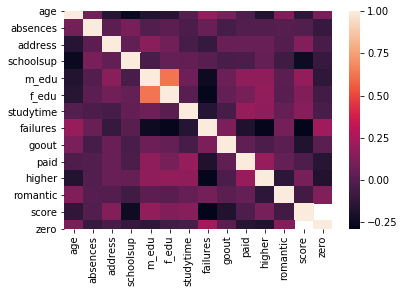

In [117]:
#Для лучшей визуализации корриляции построим тепловую карту

ter_corr = importan_for_model.corr()
sns.heatmap(ter_corr)

# Вернемся к параметрам "m_job","f_job" и привидем их в числовой эквивалент

In [118]:
#Создадим словарь для упрощения обработки и используем map
Dict_job= {'at_home': 4, 'health': 3, 'other': 5, 'services': 2, 'teacher': 1}
importan_for_model['m_job'] = importan_for_model['m_job'].map(Dict_job)
importan_for_model['f_job']= importan_for_model['f_job'].map(Dict_job)

In [119]:
# проверяем
display(importan_for_model.head())

,age,absences,address,schoolsup,m_edu,f_edu,m_job,f_job,studytime,failures,goout,paid,higher,romantic,score,zero
0,18.0,6.0,1.0,1.0,4.0,4.0,4.0,1.0,2.0,0.0,4.0,0.0,1.0,0.0,30.0,0.0
1,17.0,4.0,1.0,0.0,1.0,1.0,4.0,5.0,2.0,0.0,3.0,0.0,1.0,0.0,30.0,0.0
2,15.0,10.0,1.0,1.0,1.0,1.0,4.0,5.0,2.0,3.0,2.0,NaN,1.0,NaN,50.0,0.0
3,15.0,2.0,1.0,0.0,4.0,2.0,3.0,NaN,3.0,0.0,2.0,1.0,1.0,1.0,75.0,0.0
4,16.0,4.0,1.0,0.0,3.0,3.0,5.0,5.0,2.0,0.0,2.0,1.0,1.0,0.0,50.0,0.0


In [120]:
#Посмотрим корреляцию на score для формирования гипотез 
ter_corr = importan_for_model.corr()
pd.DataFrame(ter_corr.iloc[-2,:-2])

,score
age,-0.121579
absences,-0.014039
address,0.137977
schoolsup,-0.239106
m_edu,0.186477
f_edu,0.135268
m_job,-0.147186
f_job,-0.078866
studytime,0.155147
failures,-0.286925


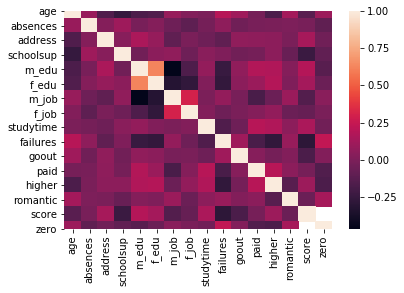

In [121]:
#Еще для наглядночти построим тепловую карту
sns.heatmap(ter_corr)

# Выводы

В результате EDA для анализа влияния критериев датасета на модель, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы были получены следующие выводы:

1. В данных достаточно много пустых значений.
2. Найдены выбросы:
      в столбце age (значение 22 удалено)
      в столбце score (значение 0.0 удалено, на его основе создан новый булевый критерий no_score)
3. Гипотезы:
      отрицательная корреляция параметра age говорит о том, что чем выше возраст тем ниже score
      небольшая отрицательная корреляция параметра romantic  говорит о том, что те, кто состоит в           отношениях имеют чуть ниже итоговую score
      отрицательная корреляция параметра failures говорит о том, что чем больше неудач по другим           предметам тем ниже score
      отрицательная корреляция параметра goout может говорить о том, что чем больше ученик                 проводит времени с друзьями тем ниже score
      положительная корреляция по парамметру m_edu говорит о том, что чем выше лучше образование           матери тем выше score
      положительная корреляция по парамметру f_edu говорит о том, что чем выше лучше образование отца       тем выше score
      положительная корреляция по параметру studytime говорит о том, что чем больше ученик тратит           времени на учебу, тем выше итоговая оценка
14 cамых важных критерия, которые предлагается использовать в дальнейшем для построения модели: age, absences, address, schoolsup, m_edu, f_edu, m_job, f_job, studytime, failures, goout, paid, higher, romantic.